# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Load dataset

In [2]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60,random_state=42)

In [3]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [4]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [6]:
inertia = []
K_range = range(1,11)

In [7]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [8]:
inertia

[1000.0,
 297.8954141051723,
 11.57548472310498,
 9.752067977356841,
 8.257175272446284,
 6.9175773204168,
 6.334755391595291,
 5.704177177901429,
 5.060234133532076,
 4.762361898130396]

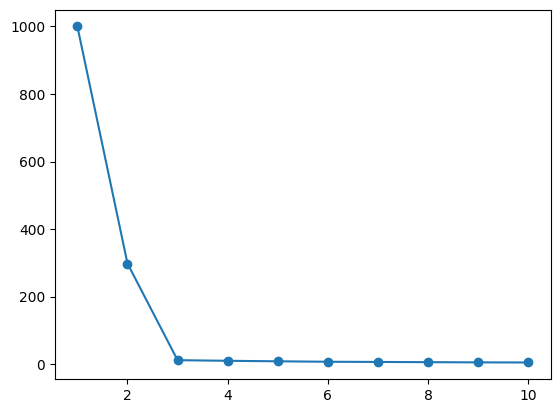

In [9]:
plt.plot(K_range, inertia, marker='o')
plt.show()

In [10]:
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [11]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [12]:
df['cluster'] = cluster_labels

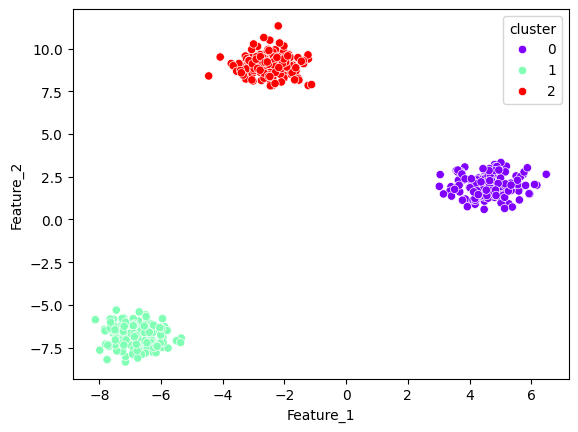

In [13]:
sns.scatterplot(x=df['Feature_1'],
               y=df['Feature_2'],
               hue=df['cluster'],
               palette='rainbow')
plt.show()

In [15]:
from sklearn.datasets import make_moons

In [16]:
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [17]:
from sklearn.cluster import KMeans, DBSCAN

In [18]:
dataset = pd.DataFrame(X, columns=['Feature_1','Feature_2'])

In [19]:
dataset

,Feature_1,Feature_2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset)

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [27]:
dataset['kmeans_cluster'] = kmeans_labels

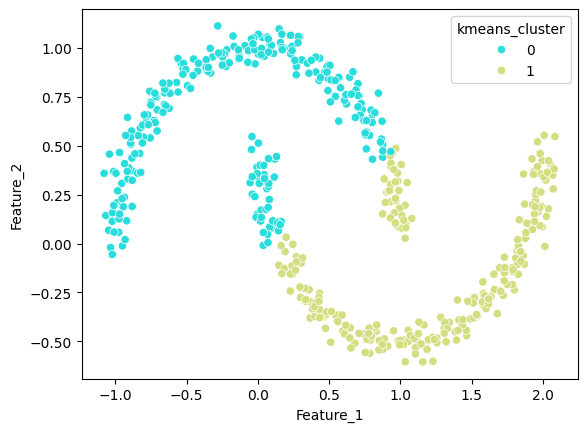

In [29]:
sns.scatterplot(x=dataset['Feature_1'], y=dataset['Feature_2'], hue=dataset['kmeans_cluster'], palette='rainbow')
plt.show()

In [31]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [32]:
dataset['dbscan_cluster'] = dbscan_labels

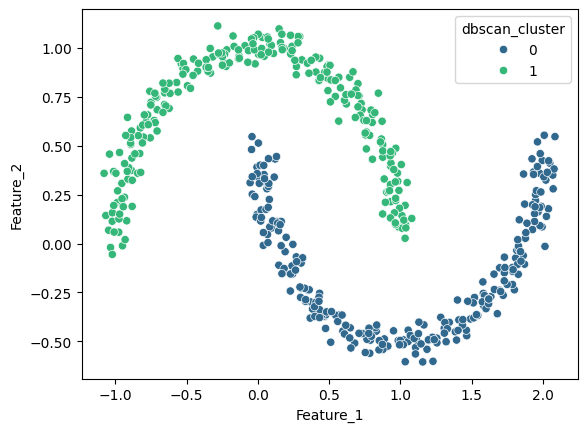

In [35]:
sns.scatterplot(x=dataset['Feature_1'], y=dataset['Feature_2'], hue=dataset['dbscan_cluster'], palette='viridis')
plt.show()